<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/introduccion_cdo_climate_data_operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Data Operators (*cdo*)


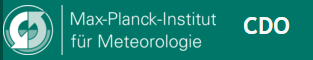

* [Web del proyecto](https://code.mpimet.mpg.de/projects/cdo/wiki/Cdo#Documentation)
* [Guía de usuario](https://code.mpimet.mpg.de/projects/cdo/embedded/cdo.pdf)

Organización de los operadores por tipo de acción:
>* Información
* Operaciones con ficheros
* Selección
* Comparación
* Modificación
* Aritmética
* Estadística
* Correlación
* Regresión
* Componentes principales
* Interpolación
* Transformación
* Entradas y salidas
* Miscelánea







## Instalación de Climate Data Operators


###A partir de condacolab

In [ ]:
# Instala conda en Colab
# Puede ser necesario ejecutar esta celda dos
# veces para completar el reinicio del entorno
# ---------------------------------------------
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Instala CDO
# -------------
condacolab.check()
!mamba install -q cdo

### A partir de conda

In [ ]:
## Consultamos la versión de Python
## ---------------------------------
#!python --version

In [ ]:
# ifile = 'Miniconda3-latest-Linux-x86_64.sh'
# !wget https://repo.anaconda.com/miniconda/{ifile}
# ! chmod +x {ifile}
# ! bash ./{ifile} -b -f -p /usr/local/
# !conda install --channel defaults conda python=3.10 --yes
# !conda update --channel defaults --all --yes
# !conda config --add channels conda-forge
## Especificar la versión de Python del entorno
## ---------------------------------------------
# os.environ['PATH'] += ":/usr/local/lib/python3.10/site-packages"
# !conda install cdo -y

##Descarga de datos

In [ ]:
ifile = 'era5_t2m_w10_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/7tJ8c3UpRK9sqVE/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
ifile = 'era5_t2m_w10_2020_europa_025.nc'

## [Información](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-560002.1)

In [ ]:
# Información y estadística básica
# ---------------------------------
!cdo info {ifile} | head -n 10

In [ ]:
# Información reducida
# ---------------------------------
!cdo sinfo {ifile} | head -n 20

In [ ]:
# Número de parámetros
# ---------------------------------
!cdo npar {ifile}

In [ ]:
# Número de niveles
# ---------------------------------
!cdo nlevel {ifile}

In [ ]:
# Número de fechas
# ---------------------------------
!cdo ndate {ifile}

In [ ]:
# Número de puntos de rejilla de cada variable
# --------------------------------------------
!cdo ngridpoints {ifile}

In [ ]:
# Formato del fichero
# --------------------
!cdo showformat {ifile}

In [ ]:
# Nombre de las variables
# -----------------------
!cdo showname {ifile}

In [ ]:
# Atributos NetCDF de las variables
# ----------------.........----------
!cdo showatts {ifile}

## [Operaciones con ficheros](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-920002.2)

En esta categoría, entre los más utilizados se encuentran los operadores de separación. Estos permiten distribuir la información contenida en un fichero entre varios en base a un criterio.

In [ ]:
# Separa un fichero de datos anuales en 12 ficheros
# con datos mensuales
# ---------------------------------------------------
!cdo splitmon {ifile} mes_

In [ ]:
# Muestra las fechas contenidas en el fichero correspondiente
# al mes de febrero
# ------------------------------------------------------------
!cdo showdate mes_02.nc

In [ ]:
# Separa el fichero de datos de febrero en uno por cada variable
# ---------------------------------------------------------------
!cdo splitvar mes_02.nc febrero_

La operación inversa de aglutinar información de múltiples ficheros en uno se lleva a cabo con los operadores de prefijo *merge*

In [ ]:
# Separa el fichero de datos de febrero en uno por cada variable
# ---------------------------------------------------------------
!cdo mergetime mes_12.nc mes_01.nc mes_02.nc DJF.nc

In [ ]:
# Muestra las fechas contenidas en el fichero correspondiente
# al mes de febrero
# ------------------------------------------------------------
!cdo showdate DJF.nc

En muchos casos los operadores pueden encadenarse anteponiendo un guión a su nombre. Esto optimiza los procesos porque evitan la creación de ficheros intermedios y la escritura a disco es a menudo un cuello de botella en el cálculo intensivo.

In [ ]:
# Encadenado de operadores
# 1) se fusionan los datos correspondientes a los meses de verano
# 2) la fusión resultante se separa en un fichero por cada variable
# ----------------------------------------------------------------------
!cdo  -splitvar -mergetime mes_06.nc mes_07.nc mes_08.nc JJA_

In [ ]:
# Limpieza
# ----------------------------------
!rm -f mes_*.nc febrero_*.nc JJA_*.nc

##[Selección](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-1670002.3)

In [ ]:
# Selecciona los datos correspondientes al invierno climatológico
# -----------------------------------------------------------------
!cdo select,name=t2m,season=DJF {ifile} DJF_t2m.nc

In [ ]:
# Elimina los días 29 de febrero que encuentre en
# el fichero de entrada (dom = day of month)
# -------------------------------------------------------
!cdo delete,dom=29feb DJF_t2m.nc DJF_t2m_sin_29feb.nc

In [ ]:
# Comprobación
# ------------------------------------------------------------
!cdo showdate DJF_t2m.nc
!cdo showdate DJF_t2m_sin_29feb.nc

Las mismas operaciones pero encadenando los operadores.

* Nótese que en general, el orden de encadenamiento puede afectar a la eficiencia.
* Cuando existe ambigüedad en el ámbito de actuación de los operadores se usan paréntesis para clarificarla.

In [ ]:
# Selecciona los datos correspondientes al invierno climatológico y eliminamos el 29 de febrero del resultado
# -O fuerza la sobreescritura
# ---------------------------------------------------------------------
!cdo -O  -delete,dom=29feb [-select,name=t2m,season=DJF   {ifile}]   DJF_t2m_sin_29feb.nc

In [ ]:
# Selecciona un rango arbitrario de fechas
# -------------------------------------------
!cdo seldate,'2020-07-24T00:00:00','2020-08-15T23:59:59' {ifile} europa_0724-0815.nc

In [ ]:
!cdo sinfo {ifile} | head -n 10

In [ ]:
# Selecciona una ventana geográfica
# -----------------------------------
!cdo sellonlatbox,-12,5,35,45 europa_0724-0815.nc  peninsula_0724-0815.nc

In [ ]:
# Importamos xarray para inspeccionar el contenido de los ficheros
# -----------------------------------------------------------------
import xarray as xr

In [ ]:
t2m = xr.open_dataset(ifile).t2m
t2m.sel(time='20200731').plot()

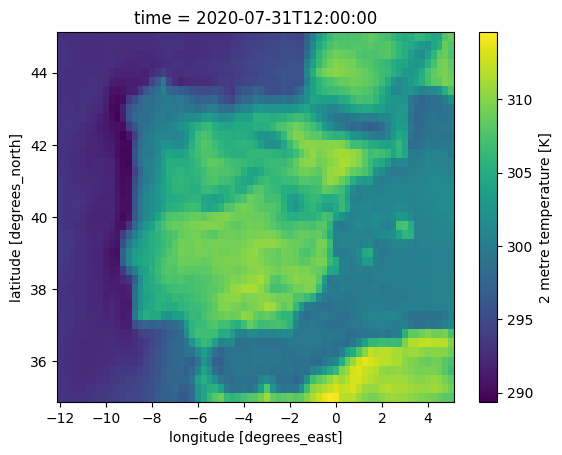

In [34]:
t2m = xr.open_dataset('peninsula_0724-0815.nc').t2m
t2m.sel(time='20200731').plot()

In [35]:
# Limpieza
# ---------
!rm -f europa_*.nc peninsula_*.nc